In [74]:
import numpy as np
from dataclasses import dataclass

n_years = 2024 - 1720

birth_per_year_mutated = []
birth_per_year_control = []

class Agent:
    def __init__(self, is_mutated, birth_year):
        self.age = 0
        self.fertile_age : tuple = (15,55)
        self.birth_rate : int = 10
        self.is_mutated : bool = is_mutated
        self.birth_year : int = birth_year
        self.total_births : int = 0

    def give_birth(self, year):
        if self.is_mutated:
            birth_per_year_mutated[year] += 1
        else:
            birth_per_year_control[year] += 1
        self.total_births += 1
        return Agent(is_mutated=self.is_mutated, birth_year=year)

agents_mutated : list[Agent] = []
agents_control : list[Agent] = []

agents_alive_mutated : list[int] = []
agents_alive_control : list[int] = []

for year in range(n_years):
    print(year)
    birth_per_year_mutated.append(0)
    birth_per_year_control.append(0)
    agents_alive_mutated.append(0)
    agents_alive_control.append(0)
    
    if year == 0:
        agents_mutated.append(Agent(is_mutated=True, birth_year=year))
        agents_control.append(Agent(is_mutated=False, birth_year=year))

    for agent in agents_mutated:
        agent.age += 1
        if agent.age % agent.birth_rate == 0 and agent.age >= agent.fertile_age[0]:
            agents_mutated.append(agent.give_birth(year))

    agents_alive_mutated[year] = len(agents_mutated)

    for i, agent in enumerate(agents_control):
        agent.age += 1
        if agent.age >= 80:
            del agents_control[i]
        if agent.age % agent.birth_rate == 0 and agent.age >= agent.fertile_age[0] and agent.age <= agent.fertile_age[1]:
            agents_control.append(agent.give_birth(year))   

    agents_alive_control[year] = len(agents_control)

print(len(agents_mutated))
        
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Muteret gruppe: 2120175
Kontrolgruppe: 538110


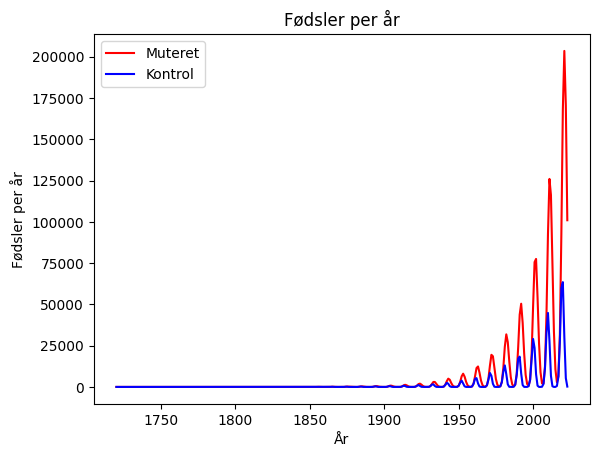

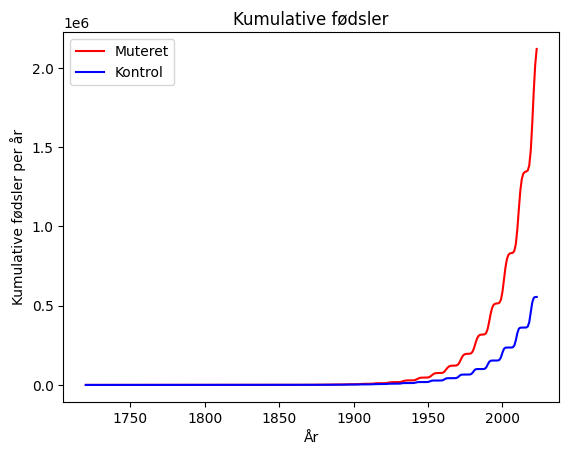

[1.04893851]


/var/folders/p6/8cdyrdjx0bb9nc27_9f01gpw0000gn/T/ipykernel_77937/1910671964.py:27: RuntimeWarning: overflow encountered in power
  return r**x


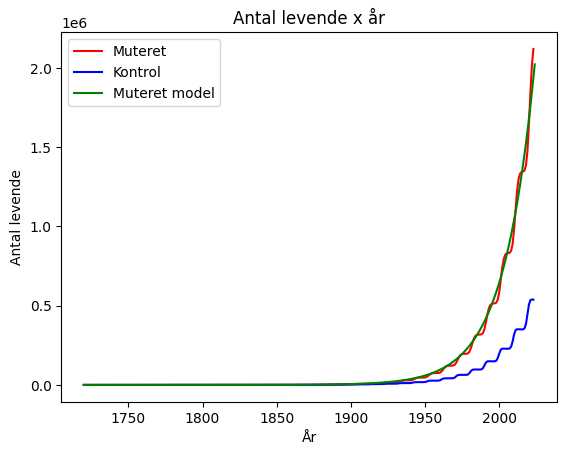

In [96]:
from matplotlib import pyplot as plt

print(f"Muteret gruppe: {len(agents_mutated)}")
print(f"Kontrolgruppe: {len(agents_control)}")

plt.clf()
plt.plot(range(1720, 1720 + n_years),birth_per_year_mutated, color="red", label = "Muteret")
plt.plot(range(1720, 1720 + n_years),birth_per_year_control, color="blue", label = "Kontrol")
plt.title("Fødsler per år")
plt.xlabel("År")
plt.ylabel("Fødsler per år")
plt.legend()
plt.show()

plt.clf()
plt.plot(range(1720, 1720 + n_years),np.cumsum(birth_per_year_mutated), color="red", label = "Muteret")
plt.plot(range(1720, 1720 + n_years),np.cumsum(birth_per_year_control), color="blue", label = "Kontrol")
plt.title("Kumulative fødsler")
plt.xlabel("År")
plt.ylabel("Kumulative fødsler per år")
plt.legend()
plt.show()

from scipy.optimize import curve_fit

def func(x, r):
    return r**x

popt, pcov = curve_fit(func, range(n_years), agents_alive_mutated)
print(popt)

x_fine = np.arange(n_years, step = 0.1)

plt.clf()
plt.plot(range(1720, 1720 + n_years),agents_alive_mutated, color="red", label = "Muteret")
plt.plot(range(1720, 1720 + n_years),agents_alive_control, color="blue", label = "Kontrol")
plt.plot(x_fine+1720, func(x_fine, *popt), color = "green", label = "Muteret model")
plt.title("Antal levende x år")
plt.xlabel("År")
plt.ylabel("Antal levende")
plt.legend()
plt.show()

Antal levende 2024 muteret 2120175
Antal levende 2024 kontrol 538110
Gennemsnitlig alder muteret 19.144573443229923
Gennemsnitlig alder kontrol 20.097576703647952
Max levende alder muteret: 304
Max levende alder kontrol: 79


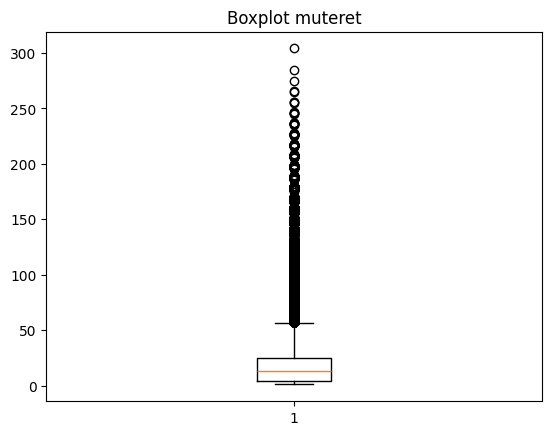

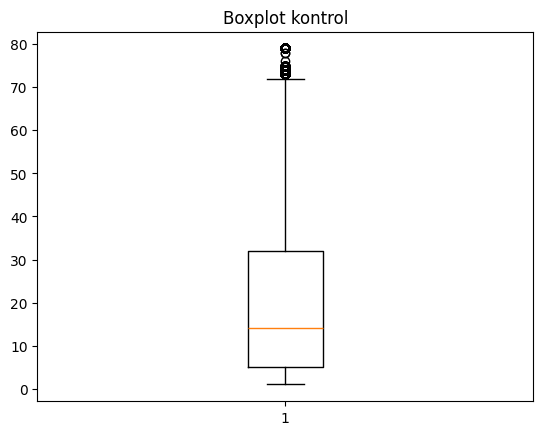

In [68]:
agents_age = [agent.age for agent in agents_mutated]
agents_age_control = [agent.age for agent in agents_control]

agents_alive_control[-1]

print(f"Antal levende 2024 muteret {agents_alive_mutated[-1]}")
print(f"Antal levende 2024 kontrol {agents_alive_control[-1]}")

print(f"Gennemsnitlig alder muteret {np.mean(agents_age)}")
print(f"Gennemsnitlig alder kontrol {np.mean(agents_age_control)}")

print(f"Max levende alder muteret: {max(agents_age)}")
print(f"Max levende alder kontrol: {max(agents_age_control)}")

plt.clf()
plt.title("Boxplot muteret")
plt.boxplot(agents_age)
plt.show()

plt.clf()
plt.title("Boxplot kontrol")
plt.boxplot(agents_age_control)
plt.show()

In [94]:

#8000000000 = 1.04893851**x
#np.log(8000000000) = np.log(1.04893851)*x
np.log(8000000000) / np.log(1.04893851)

1.04893851**477.2566566861558



8000000000.000016